In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-data-from-9thapr2014-to-30thdec2022/BTC_Data_final.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

**Data processing:**

In [3]:
df=pd.read_csv('/kaggle/input/bitcoin-data-from-9thapr2014-to-30thdec2022/BTC_Data_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3180 non-null   object 
 1   priceUSD                3180 non-null   float64
 2   size                    3180 non-null   float64
 3   sentbyaddress           3180 non-null   int64  
 4   transactions            3180 non-null   int64  
 5   mining_profitability    3180 non-null   float64
 6   sentinusd               3180 non-null   float64
 7   transactionfees         3180 non-null   float64
 8   median_transaction_fee  3180 non-null   float64
 9   confirmationtime        3180 non-null   float64
 10  marketcap               3180 non-null   int64  
 11  transactionvalue        3180 non-null   float64
 12  mediantransactionvalue  3180 non-null   float64
 13  tweets                  3180 non-null   int64  
 14  google_trends           3180 non-null   

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
plt.style.use('seaborn-dark')

In [7]:
plt.style.use('seaborn-dark-palette')

**Exploratory data analysis:**

<AxesSubplot:title={'center':'Bitcoin price over the years'}, xlabel='Date'>

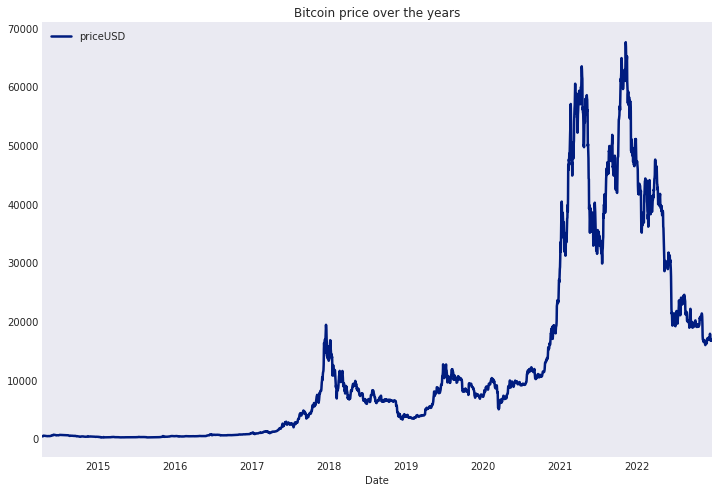

In [8]:
df.plot(x='Date',y='priceUSD',kind='line',figsize=(12,8),lw=2.5,title='Bitcoin price over the years')

<AxesSubplot:title={'center':'Mining profitability over the years'}, xlabel='Date'>

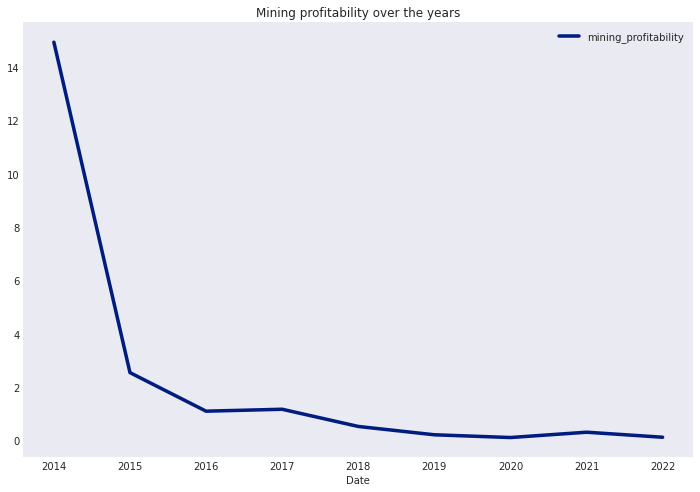

In [9]:
btcm=pd.pivot_table(df,index=df['Date'].dt.year,values='mining_profitability',aggfunc='mean')
btcm=btcm.sort_values(by='Date', ascending=True)
btcm=btcm.head(10)
btcm.plot(kind='line',lw=3.5,figsize=(12,8),title='Mining profitability over the years')

<AxesSubplot:title={'center':'Market size'}, xlabel='Date'>

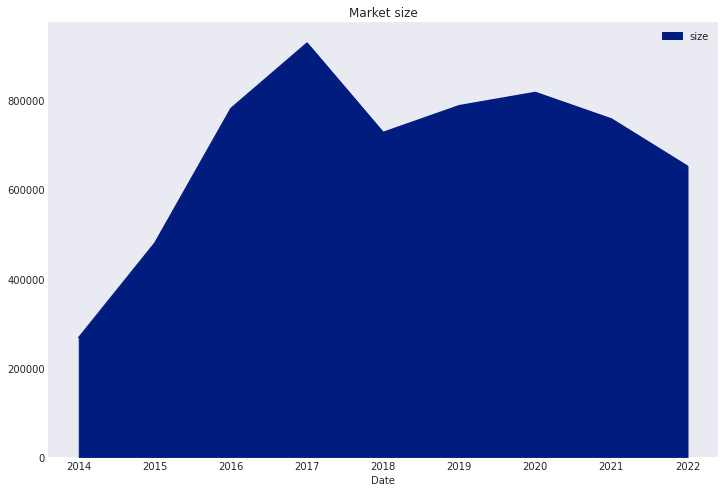

In [10]:
mnth=pd.pivot_table(df,index=[df['Date'].dt.year], values='size',aggfunc='mean')
mnth=mnth.sort_values(by='Date',ascending=True)
mnth.plot(kind='area',figsize=(12,8),title='Market size',)

<AxesSubplot:title={'center':'Average transaction value over the years'}, xlabel='Date'>

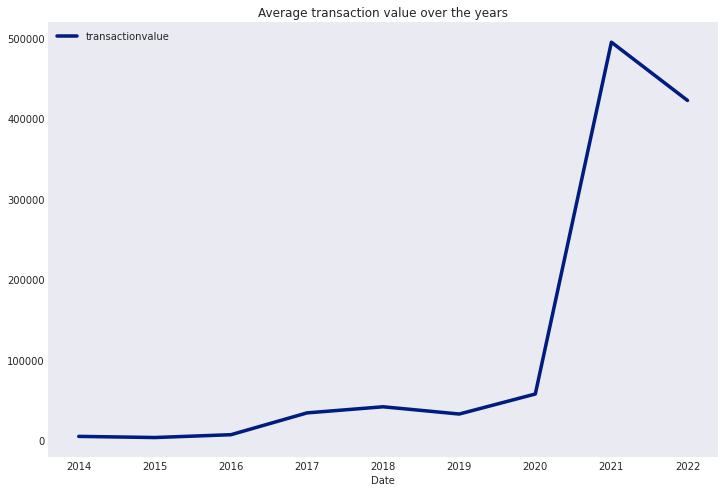

In [11]:
btcm1=pd.pivot_table(df,index=df['Date'].dt.year,values='transactionvalue',aggfunc='mean')
btcm1=btcm1.sort_values(by='Date', ascending=True)
btcm1=btcm1.head(10)
btcm1.plot(kind='line',lw=3.5,figsize=(12,8),title='Average transaction value over the years')

<AxesSubplot:title={'center':'Bitcoin Marketcap'}, xlabel='Date'>

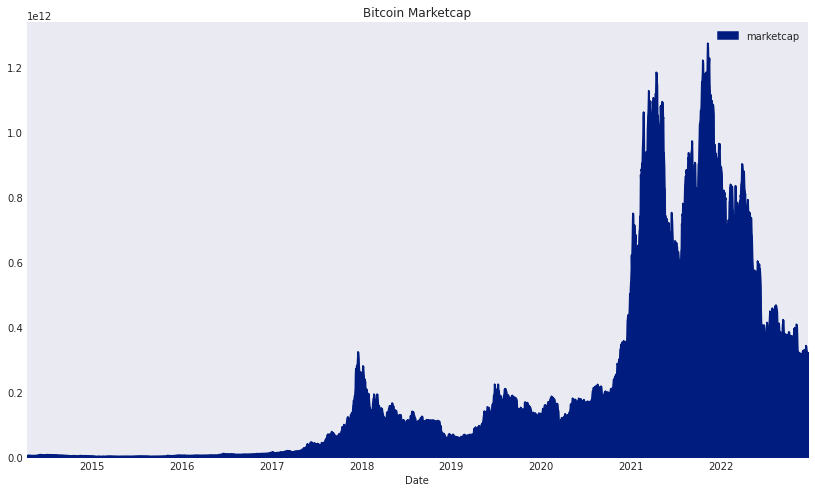

In [12]:
df.plot(x='Date',y=['marketcap'],kind='area',lw=1.5,figsize=(14,8),title='Bitcoin Marketcap')

<AxesSubplot:title={'center':'Date/confirmation time correlation'}, xlabel='Date', ylabel='[confirmationtime]'>

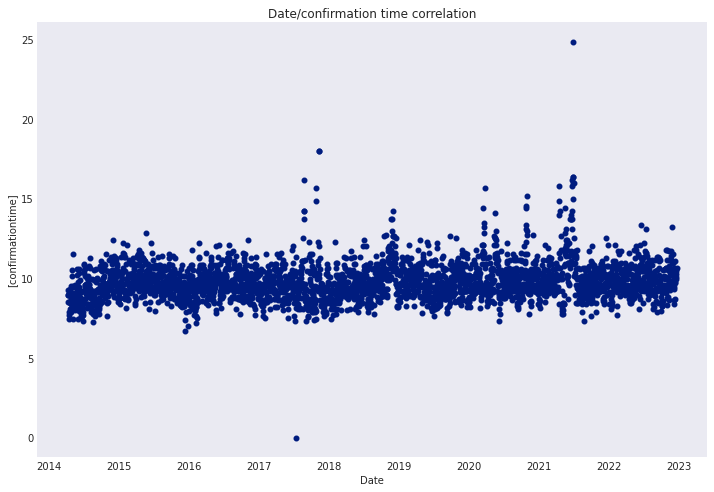

In [13]:
df.plot(x='Date',y=['confirmationtime'],kind='scatter',lw=1.5,figsize=(12,8),title='Date/confirmation time correlation')

<AxesSubplot:title={'center':'Marketcap / Price correlation'}, xlabel='marketcap', ylabel='priceUSD'>

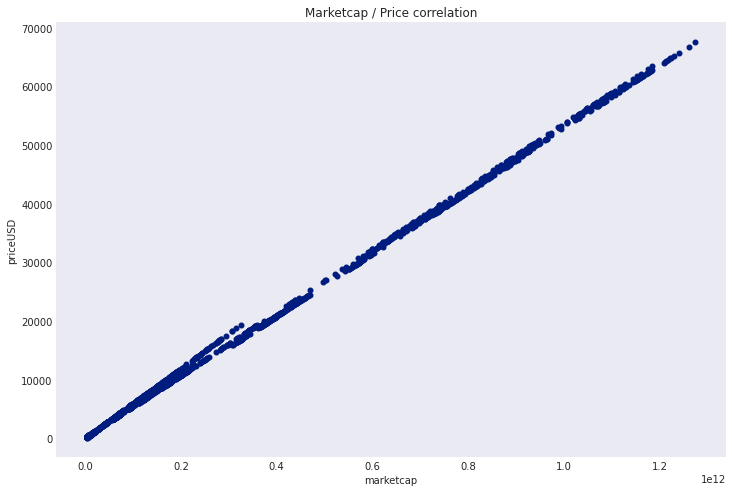

In [14]:
df.plot(x='marketcap',y='priceUSD',kind='scatter',lw=1.5,figsize=(12,8),title='Marketcap / Price correlation')

<AxesSubplot:title={'center':'Correlation between active adress and BTC sent'}, xlabel='sentbyaddress', ylabel='activeaddresses'>

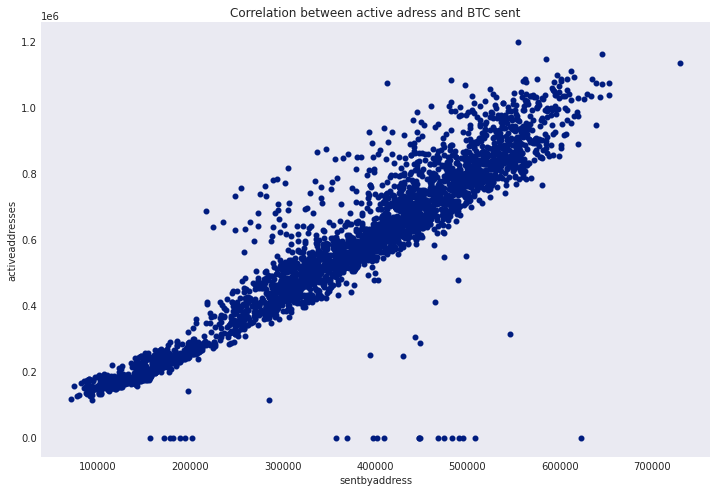

In [15]:
df.plot(x='sentbyaddress',y='activeaddresses',kind='scatter',lw=1.5,figsize=(12,8),title='Correlation between active adress and BTC sent')

In [16]:
df.corr()

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
priceUSD,1.000000,0.147141,0.589577,0.312164,-0.237205,0.624431,0.460870,0.376900,0.102327,0.999778,0.822821,0.480928,0.783683,0.646512,0.120889,0.665413,-0.596287
size,0.147141,1.000000,0.700159,0.805315,-0.565854,0.096495,0.353094,0.363810,0.229891,0.139512,0.020877,0.364301,0.104302,0.381499,0.612873,0.654849,-0.436668
sentbyaddress,0.589577,0.700159,1.000000,0.882427,-0.541474,0.454815,0.390353,0.375807,0.049173,0.586954,0.436387,0.509648,0.525237,0.541979,0.462407,0.931827,-0.764684
transactions,0.312164,0.805315,0.882427,1.000000,-0.556822,0.227009,0.288133,0.297366,-0.009010,0.306303,0.175345,0.359071,0.199492,0.412413,0.447683,0.796894,-0.695278
mining_profitability,-0.237205,-0.565854,-0.541474,-0.556822,1.000000,-0.161788,-0.099355,-0.082051,-0.190414,-0.235916,-0.165800,-0.162429,-0.210821,-0.196332,-0.162855,-0.485506,0.336263
sentinusd,0.624431,0.096495,0.454815,0.227009,-0.161788,1.000000,0.250652,0.207690,0.063630,0.626739,0.782153,0.353630,0.665670,0.428517,0.065151,0.475118,-0.362876
transactionfees,0.460870,0.353094,0.390353,0.288133,-0.099355,0.250652,1.000000,0.986420,0.110562,0.449174,0.191596,0.773906,0.325253,0.746109,0.729848,0.474793,-0.293572
median_transaction_fee,0.376900,0.363810,0.375807,0.297366,-0.082051,0.207690,0.986420,1.000000,0.098334,0.364642,0.127466,0.786128,0.273459,0.729825,0.771016,0.444030,-0.261856
confirmationtime,0.102327,0.229891,0.049173,-0.009010,-0.190414,0.063630,0.110562,0.098334,1.000000,0.103860,0.070944,0.064350,0.113621,0.078290,0.150506,0.022941,-0.128568
marketcap,0.999778,0.139512,0.586954,0.306303,-0.235916,0.626739,0.449174,0.364642,0.103860,1.000000,0.826631,0.468944,0.786806,0.635403,0.110449,0.660903,-0.595063


In [17]:
prr=pd.pivot_table(df,index=df['Date'].dt.year,values='priceUSD',aggfunc='max')
prr=prr.sort_values(by='Date', ascending=True)
prr=prr.head(10)
prr

,priceUSD
Date,
2014,664.422
2015,462.587
2016,965.624
2017,19401.000
2018,16784.000
2019,12668.000
2020,28876.000
2021,67547.000
2022,47546.000


<AxesSubplot:title={'center':'Highest BTC price'}, ylabel='Date'>

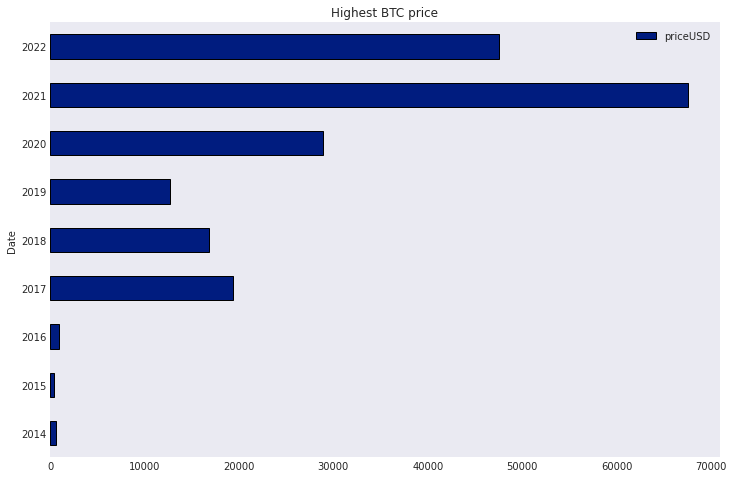

In [28]:

prr.plot(kind='barh',figsize=(12,8),title='Highest BTC price',edgecolor='black',)

In [19]:
prr2=pd.pivot_table(df,index=df['Date'].dt.year,values='tweets',aggfunc='mean')
prr2=prr2.sort_values(by='Date', ascending=True)
prr2=prr2.head(10)
prr2

,tweets
Date,
2014,20175.861423
2015,30769.200000
2016,22905.688525
2017,47858.427397
2018,39311.717808
2019,18972.580822
2020,34467.956284
2021,114432.449315
2022,139156.353933


<AxesSubplot:title={'center':'Average tweets over the years'}, xlabel='Date'>

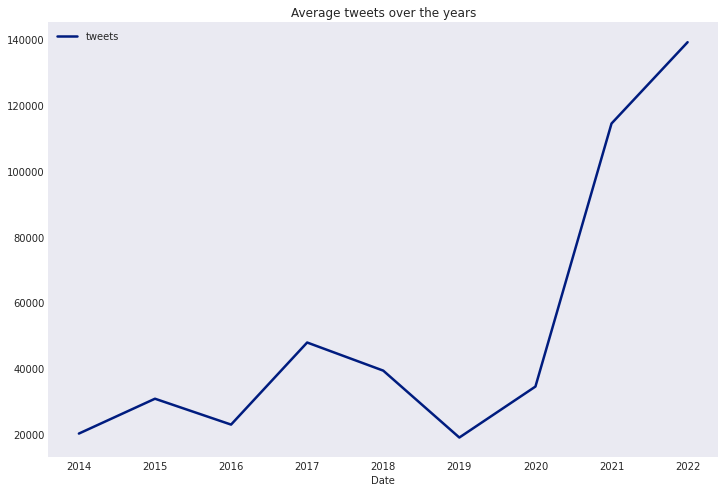

In [20]:
prr2.plot(kind='line',lw=2.5,figsize=(12,8),title='Average tweets over the years')

In [21]:
prr3=pd.pivot_table(df,index=df['Date'].dt.year,values='google_trends',aggfunc='mean')
prr3=prr3.sort_values(by='Date', ascending=True)
prr3=prr3.head(16)
prr3

,google_trends
Date,
2014,8.243431
2015,7.716471
2016,10.193303
2017,69.444945
2018,59.580964
2019,40.533523
2020,53.567874
2021,142.261238
2022,57.967025


<AxesSubplot:title={'center':'Average Google trends over the years'}, xlabel='Date'>

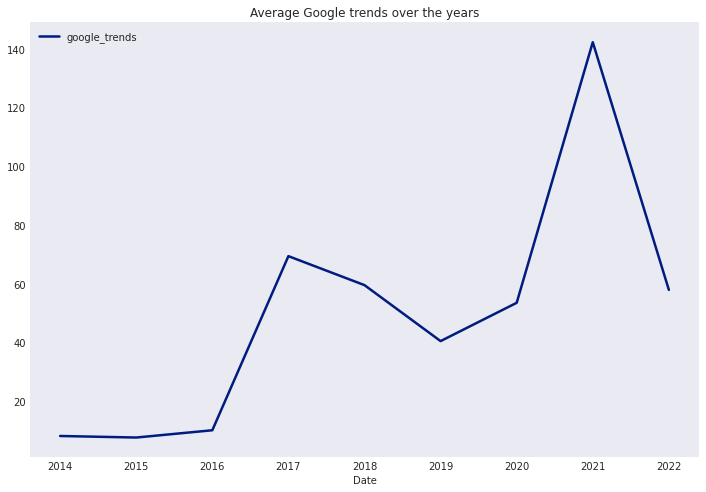

In [22]:
prr3.plot(kind='line',lw=2.5,figsize=(12,8),title='Average Google trends over the years')

<AxesSubplot:title={'center':'Average Confirmation time over the years'}, xlabel='Date'>

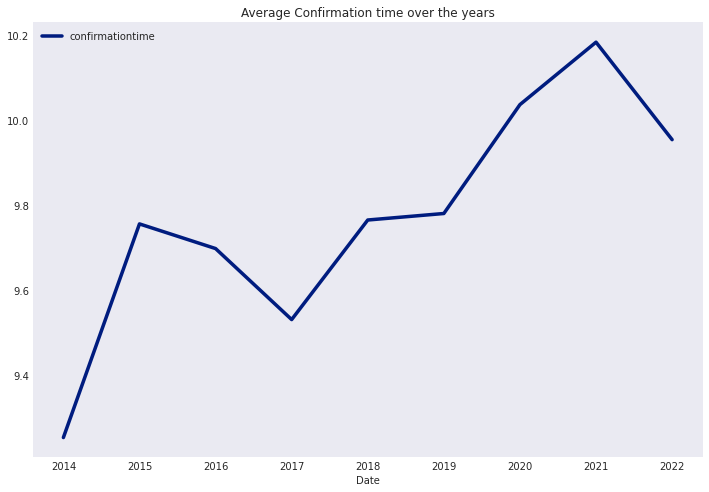

In [23]:
prr4=pd.pivot_table(df,index=df['Date'].dt.year,values='confirmationtime',aggfunc='mean')
prr4=prr4.sort_values(by='Date', ascending=True)
prr4=prr4.head(10)
prr4.plot(kind='line',lw=3.5,figsize=(12,8),title='Average Confirmation time over the years')

In [24]:
df.tail()

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
3175,2022-12-18,16736.0,511467.0,439567,212528,0.0650,3.493454e+09,0.912,0.377,9.931,321956223728,55620.0,400.564,81518,15.485,1.263,691511,14.731
3176,2022-12-19,16679.0,706111.0,484919,258960,0.0569,6.191116e+09,1.164,0.450,10.588,320876529094,67503.0,447.028,100038,17.697,2.083,804421,14.672
3177,2022-12-20,16788.0,665567.0,510455,268753,0.0630,6.787239e+09,1.128,0.470,10.286,322974092809,61942.0,449.510,90756,18.329,2.022,815486,14.681
3178,2022-12-21,16830.0,653348.0,515872,272348,0.0620,6.851055e+09,1.021,0.418,10.070,323809163721,53386.0,434.257,88992,18.329,1.817,782726,14.673
3179,2022-12-22,16779.0,676142.0,526770,271046,0.0596,5.924482e+09,1.061,0.442,10.667,322835455577,50808.0,453.449,88226,18.329,1.992,789264,14.687


**Data correlation:**

<AxesSubplot:>

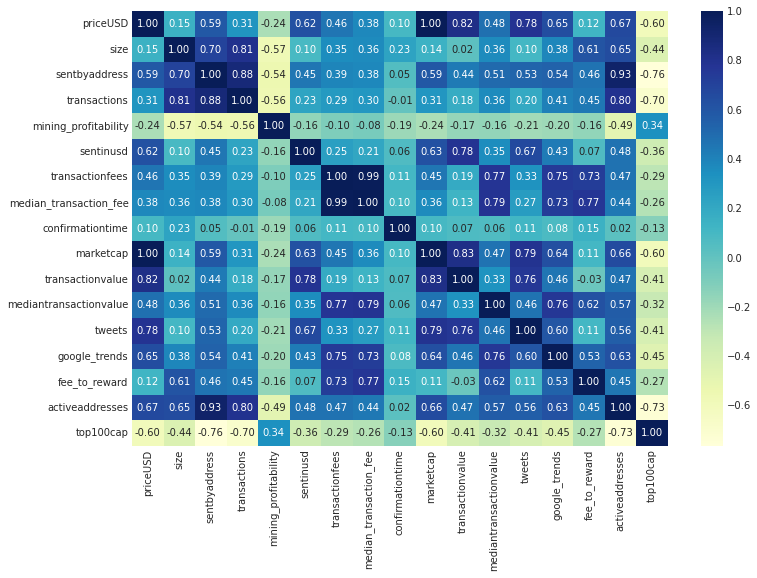

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

**If you like my notebook, please support my work using upvote button! Thank you!**